In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/mcgc.tsv', sep='\t')
df.head(100)

,time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
0,0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,15,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,30,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,45,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,60,0.003,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1380,1.207,1.131,1.209,1.008,1.207,1.209,1.207,1.209,1.209,...,1.208,0.943,1.131,0.964,1.163,1.208,1.180,1.118,1.209,1.208
93,1395,1.207,1.137,1.209,1.011,1.208,1.209,1.208,1.209,1.209,...,1.208,0.948,1.137,0.968,1.168,1.208,1.183,1.124,1.209,1.208
94,1410,1.207,1.143,1.209,1.014,1.208,1.209,1.208,1.209,1.209,...,1.208,0.952,1.143,0.971,1.172,1.208,1.186,1.130,1.209,1.208
95,1425,1.207,1.148,1.209,1.017,1.209,1.209,1.209,1.209,1.209,...,1.208,0.956,1.148,0.974,1.176,1.208,1.189,1.136,1.209,1.208


In [3]:
meta = pd.read_csv('https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/mcgc_METADATA.txt', sep='\t')
meta

,Strain,WT,MUT,WT.1,MUT.1,WT.2,MUT.2
0,Strain1_Rep1,A1,A2,B1,B2,C1,C2
1,Strain1_Rep2,A3,A4,B3,B4,C3,C4
2,Strain2_Rep1,A5,A6,B5,B6,C5,C6
3,Strain2_Rep2,A7,A8,B7,B8,C7,C8
4,Strain3_Rep1,A9,A10,B9,B10,C9,C10
5,Strain2_Rep2,A11,A12,B11,B12,C11,C12


<Figure size 1500x500 with 0 Axes>

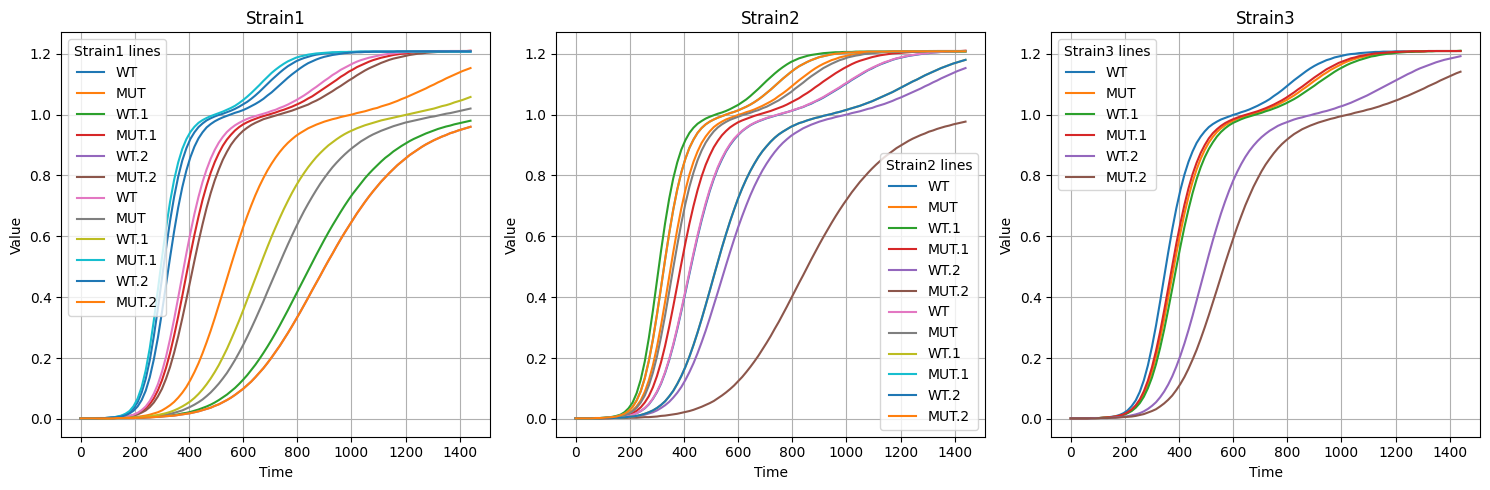

In [5]:

plt.figure(figsize=(15, 5))

def plot_line(strain, ax):
    strain_data = meta[meta['Strain'] == strain].drop('Strain', axis=1)
    for column_value in strain_data.values[0]:
        sns.lineplot(x=df['time'], y=df[column_value], label=meta.columns[meta.isin([column_value]).any()][0], ax=ax)
    ax.legend(title=f"{strain[0:-5]} lines")
    ax.set_title(strain[0:-5])
    ax.set_xlabel("Time")
    ax.set_ylabel("Value")
    ax.grid(True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

plot_line('Strain1_Rep1', ax1)
plot_line('Strain1_Rep2', ax1)

plot_line('Strain2_Rep1', ax2)
plot_line('Strain2_Rep2', ax2)

plot_line('Strain3_Rep1', ax3)

plt.tight_layout()

plt.show()

In [12]:
new_df_data = {
            'Strain':[],
            'Column':[],
            'Time_80%':[],
            'Max Value':[]
        }
def time_capacity(strain):
    strain_data = meta[meta['Strain'] == strain].drop('Strain', axis=1)
    for column_value in strain_data.values[0]:
        column = meta.columns[meta.isin([column_value]).any()][0]
        min_diff = abs(df[column_value] - (df[column_value].max() * 0.8)).idxmin()
        max_value = df.loc[min_diff, column_value]
        time = df.loc[min_diff, 'time']
        new_df_data['Strain'].append(strain)
        new_df_data['Column'].append(column)
        new_df_data['Time_80%'].append(time)
        new_df_data['Max Value'].append(max_value)

time_capacity("Strain1_Rep1")
time_capacity("Strain1_Rep2")
time_capacity("Strain2_Rep1")
time_capacity("Strain2_Rep2")
time_capacity("Strain3_Rep1")
new_df = pd.DataFrame(new_df_data)
new_df

,Strain,Column,Time_80%,Max Value
0,Strain1_Rep1,WT,450,0.971
1,Strain1_Rep1,MUT,780,0.919
2,Strain1_Rep1,WT.1,1050,0.791
3,Strain1_Rep1,MUT.1,600,0.968
4,Strain1_Rep1,WT.2,1095,0.764
5,Strain1_Rep1,MUT.2,630,0.966
6,Strain1_Rep2,WT,570,0.965
7,Strain1_Rep2,MUT,915,0.810
8,Strain1_Rep2,WT.1,855,0.844
9,Strain1_Rep2,MUT.1,420,0.960


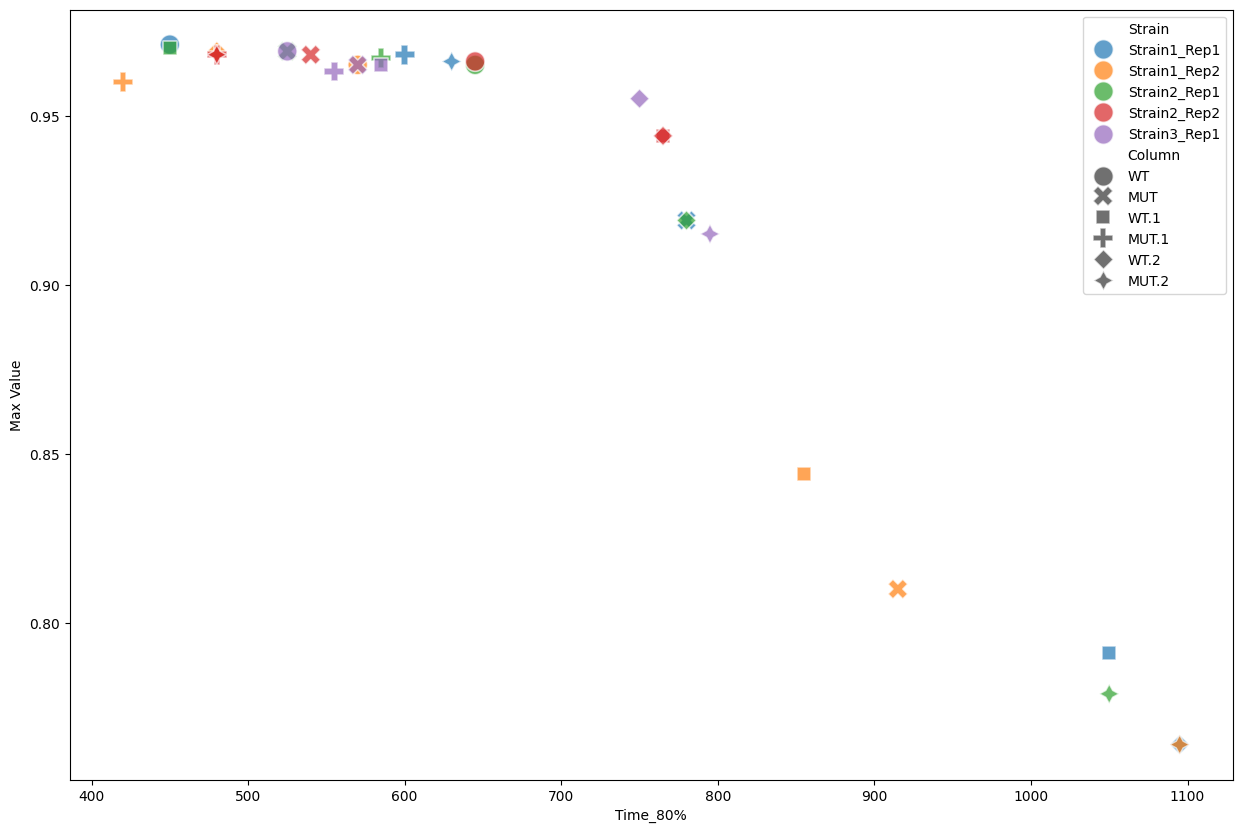

In [13]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Time_80%', y='Max Value', hue='Strain', data=new_df,style='Column', s=200, alpha=0.7)
plt.show()

In [14]:
new_df['Strain'] = new_df['Strain'].str.replace(r'_Rep[12]', '', regex=True)
new_df['Column'] = new_df['Column'].str.replace(r'WT.[12]', 'WT', regex=True)
new_df['Column'] = new_df['Column'].str.replace(r'MUT.[12]', 'MUT', regex=True)
new_df.head()

,Strain,Column,Time_80%,Max Value
0,Strain1,WT,450,0.971
1,Strain1,MUT,780,0.919
2,Strain1,WT,1050,0.791
3,Strain1,MUT,600,0.968
4,Strain1,WT,1095,0.764


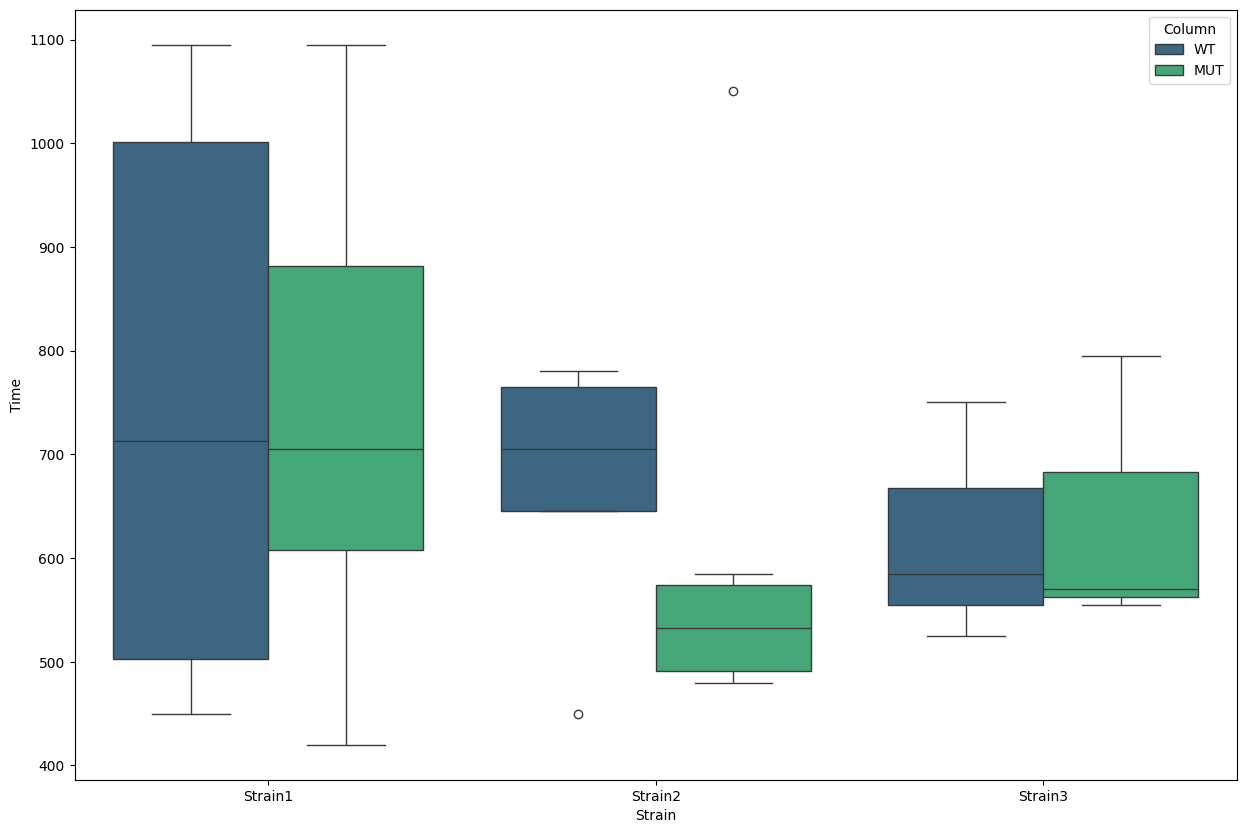

In [15]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Strain', y='Time_80%', data=new_df, palette='viridis', hue='Column')
plt.xlabel('Strain')
plt.ylabel('Time')
plt.show()

In [16]:
from scipy.stats import shapiro, levene

# Separate data into WT and MUT
wt_time = new_df[new_df['Column'] == 'WT']['Time_80%']
mut_time = new_df[new_df['Column'] == 'MUT']['Time_80%']

# Normality test
print("Shapiro-Wilk test for WT:", shapiro(wt_time))
print("Shapiro-Wilk test for MUT:", shapiro(mut_time))

# Homogeneity of variance test
print("Levene's test:", levene(wt_time, mut_time))


Shapiro-Wilk test for WT: ShapiroResult(statistic=0.9234333872334897, pvalue=0.21726185894729516)
Shapiro-Wilk test for MUT: ShapiroResult(statistic=0.8697552834471732, pvalue=0.033462976686995306)
Levene's test: LeveneResult(statistic=0.005596921693068812, pvalue=0.9408957826784303)


In [21]:
from scipy import stats
from scipy.stats import kruskal

stat, p_value = stats.mannwhitneyu(wt_time, mut_time)
print("T-statistic:", stat)
print("P-value:", p_value)


strain_groups = [new_df[new_df['Strain'] == strain]['Time_80%'] for strain in new_df['Strain'].unique()]
kruskal_stat, kruskal_p = kruskal(*strain_groups)
print(f"Kruskal-Wallis test: H={kruskal_stat:.3f}, p={kruskal_p:.3f}")

# There is no significant differences regarding the time to reach the carrying capacity between the wild type and mutated type because the p-value was larger than 0.05

T-statistic: 122.0
P-value: 0.7085206805370319
Kruskal-Wallis test: H=1.126, p=0.570
